In [1]:
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
limit_time =  0
noisy = 1

In [3]:
# ant = 'generated_dataset/Antmaze_umaze_fixstart_fixgoal.hdf5'
# ant_timelimit = "generated_dataset/Antmaze_umaze_fixstart_fixgoal_timelimit.hdf5" 

In [4]:
point = 'generated_dataset/maze2d-umaze-v1.hdf5'
point_timelimit = "generated_dataset/maze2d-umaze-v1_timelimit.hdf5"
point_noisy = 'generated_dataset/maze2d-umaze-v1-noisy.hdf5'
point_noisy_timelimit = 'generated_dataset/maze2d-umaze-v1_timelimit-noisy.hdf5'


In [5]:
if limit_time:
    if noisy:
        fname = point_noisy_timelimit
    else:
        fname = point_timelimit
else:
    if noisy:
        fname = point_noisy
    else:
        fname = point

In [6]:
print(fname)

f = h5py.File(fname, 'r')
list(f.keys())

generated_dataset/maze2d-umaze-v1-noisy.hdf5


['actions', 'infos', 'observations', 'rewards', 'terminals']

In [7]:
data = dict(
    act =  np.asarray(f['actions']),
    obs =  np.asarray(f['observations']),
    done = np.asarray(f['terminals']),
    # timeout = np.asarray(f['timeouts']),
)

In [8]:
for k, v in data.items():
    print(k, v.shape)

act (17043, 2)
obs (17043, 4)
done (17043,)


In [9]:
act_df = pd.DataFrame(data=data['act'])
obs_df = pd.DataFrame(data=data['obs'])
done_df = pd.DataFrame(data=data['done'])
# timeout_df = pd.DataFrame(data=data['timeout'])

In [10]:
obs_df.iloc[:, [0,1,2]].head(5)

,0,1,2
0,3.000000,1.000000,0.000000
1,2.999306,1.001932,-0.069357
2,2.997221,1.006242,-0.208524
3,2.995689,1.011307,-0.153191
4,2.993122,1.018714,-0.256744


# plot


In [11]:
def visualize_path_ant(data=None, goal=[0, 8]):
    """ """
    fig = plt.figure()
    offset = -2
    size = 0.25 + 2 * 0.08
    scaling = 4
    # path
    if data is not None:
        plt.plot(data[:, 0], data[:, 1], "o-")
        plt.plot(
            data[0, 0],
            data[0, 1],
            "go",
            markersize=10,
            markeredgecolor="k",
            label="start",
        )
        plt.plot(
            data[-1, 0],
            data[-1, 1],
            "ro",
            markersize=10,
            markeredgecolor="k",
            label="achieved goal",
        )
        # achived goal with radius
        achieved_circle = plt.Circle(
            xy=(data[-1, 0], data[-1, 1]),
            radius=0.1,
            color="r",
            lw=1,
            label="achieved region",
        )
        plt.gca().add_patch(achieved_circle)

    # goal pos
    plt.plot(
        goal[0], goal[1], "bo", markersize=10, markeredgecolor="k", label="desired goal"
    )
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1,
        label="goal region",
    )
    plt.gca().add_patch(goal_region)

    # UMaze boundary
    UMaze_x = np.array([0, 3, 3, 0, 0, 2, 2, 0, 0]) * scaling + offset
    UMaze_y = np.array([0, 0, 3, 3, 2, 2, 1, 1, 0]) * scaling + offset
    plt.plot(UMaze_x, UMaze_y, "r")

    # feasible region
    UMaze_feasible_x = UMaze_x + size * np.array([1, -1, -1, 1, 1, 1, 1, 1, 1])
    UMaze_feasible_y = UMaze_y + size * np.array([1, 1, -1, -1, 1, 1, -1, -1, 1])
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")

    plt.legend()
    plt.grid()

In [12]:
def visualize_path_point(data, goal, save=False):
    """"""
    fig = plt.figure()
    offset = 0.3
    size = 0.1
    
    # path
    plt.plot(data[:, 0], data[:, 1], "x-")

    plt.plot(
        data[0, 0],
        data[0, 1],
        "go",
        markersize=10,
        markeredgecolor="k", 
        label="start"
    )
    plt.plot(
        data[-1, 0],
        data[-1, 1],
        "ro",
        markersize=10,
        markeredgecolor="k",
        label="achieved goal",
    )
    plt.plot(
        goal[0],
        goal[1],
        "bo",
        markersize=10,
        markeredgecolor="k",
        label="desired goal"
    )

    # UMaze boundary
    UMaze_x = np.array([0., 1., 1., 2., 2., 3., 3., 0., 0.]) + offset
    UMaze_y = np.array([0., 0., 2., 2., 0., 0., 3., 3., 0.]) + offset
    plt.plot(UMaze_x, UMaze_y, "r")
    
    
    # feasible region
    # UMaze_feasible_x = np.array([0.1, 0.9, 0.9, 2.1, 2.1, 2.9, 2.9, 0.1, 0.1]) + offset
    UMaze_feasible_x = UMaze_x.copy()
    UMaze_feasible_x[0] += size
    UMaze_feasible_x[1:3] -= size
    UMaze_feasible_x[3:5] += size
    UMaze_feasible_x[5:7] -= size
    UMaze_feasible_x[7:] += size
    
    # UMaze_feasible_y = np.array([0.1, 0.1, 2.1, 2.1, 0.1, 0.1, 2.9, 2.9, 0.1]) + offset
    UMaze_feasible_y = UMaze_y.copy()
    UMaze_feasible_y[:6] += size
    UMaze_feasible_y[6:8] -= size
    UMaze_feasible_y[8] += size
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")
    
    # achieved goal with radius
    achieved_circle = plt.Circle(
        xy=(data[-1, 0], data[-1, 1]),
        radius=0.1,
        color="r",
        lw=1,
        label="achieved region"
    )
    plt.gca().add_patch(achieved_circle)
    
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1, 
        label="goal region",
    )
    plt.gca().add_patch(goal_region)
    
    plt.legend()
    plt.grid()

# show 

## timelimit

In [13]:

if fname in (point_timelimit, point_noisy_timelimit):
    dones = [i for i in range(data['obs'].shape[0]) if data['done'][i]]
    # assert len(dones)/2 == 100
    print(dones, len(dones), "\n")
     
    for k in range(2, len(dones), 2):
        assert dones[k] - dones[k-2] == 301
    
    dones = [d for idx, d in enumerate(dones) if idx % 2 == 0] 
    assert len(dones) == 100
    print(dones)

    
    i = 0
    for num, j in enumerate(dones):
    
        
        visualize_path_point(data['obs'][i:j+2, :2], goal=[1, 1])
        plt.title(f"Path: {num}, from [{i} : {j+2})")
        plt.show()
        i = j+2
        
        if num == 10:
            break
    

## First Exit 

[159, 160, 331, 332, 495, 496, 665, 666, 838, 839, 1011, 1012, 1183, 1184, 1347, 1348, 1510, 1511, 1683, 1684, 1855, 1856, 2031, 2032, 2200, 2201, 2362, 2363, 2535, 2536, 2709, 2710, 2881, 2882, 3050, 3051, 3221, 3222, 3385, 3386, 3556, 3557, 3729, 3730, 3902, 3903, 4073, 4074, 4289, 4290, 4463, 4464, 4623, 4624, 4789, 4790, 4950, 4951, 5125, 5126, 5286, 5287, 5464, 5465, 5646, 5647, 5821, 5822, 5986, 5987, 6156, 6157, 6326, 6327, 6506, 6507, 6673, 6674, 6844, 6845, 7011, 7012, 7186, 7187, 7356, 7357, 7522, 7523, 7684, 7685, 7850, 7851, 8026, 8027, 8188, 8189, 8356, 8357, 8578, 8579, 8745, 8746, 8907, 8908, 9081, 9082, 9251, 9252, 9428, 9429, 9598, 9599, 9762, 9763, 9930, 9931, 10099, 10100, 10268, 10269, 10448, 10449, 10622, 10623, 10798, 10799, 10963, 10964, 11136, 11137, 11306, 11307, 11475, 11476, 11650, 11651, 11815, 11816, 11986, 11987, 12152, 12153, 12324, 12325, 12501, 12502, 12678, 12679, 12848, 12849, 13017, 13018, 13176, 13177, 13343, 13344, 13514, 13515, 13678, 13679, 13850

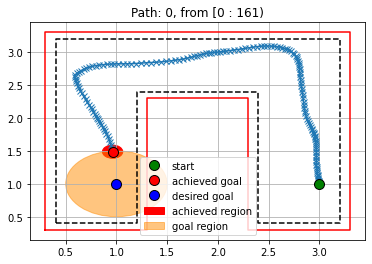

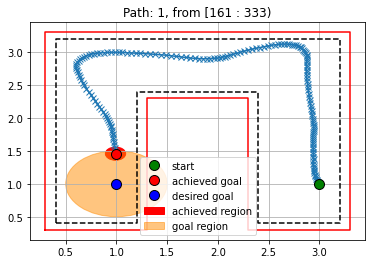

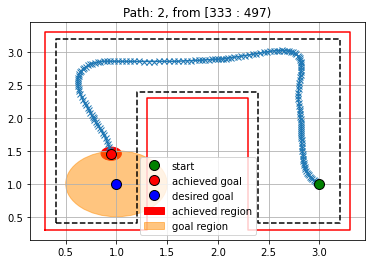

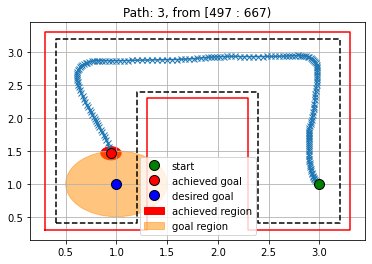

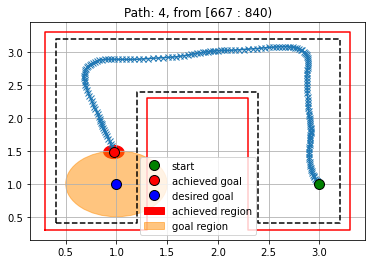

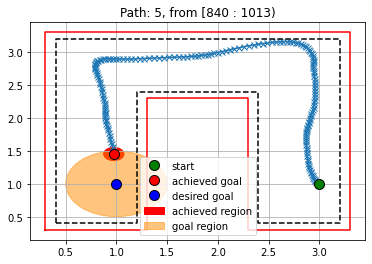

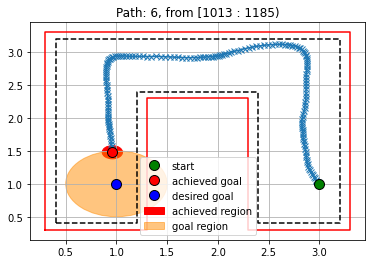

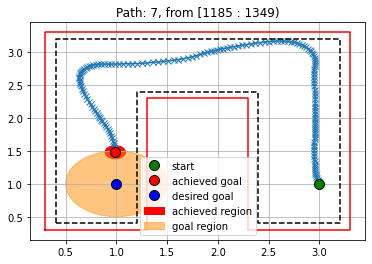

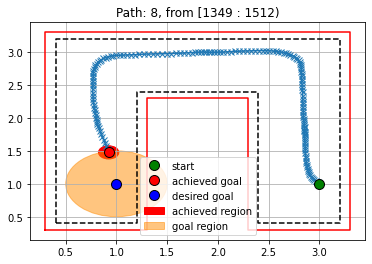

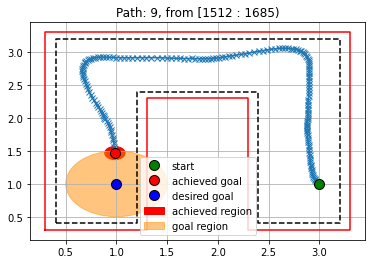

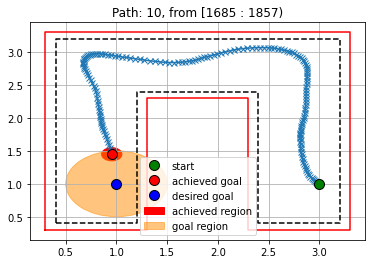

In [15]:


if fname in (point, point_noisy):
    dones = [i for i in range(data['obs'].shape[0]) if data['done'][i]]
    # assert len(dones)/2 == 100
    print(dones, len(dones), "\n")
     
    dones = [d for idx, d in enumerate(dones) if idx % 2 == 0] 
    assert len(dones) == 100
    print(dones)

    
    i = 0
    for num, j in enumerate(dones):
        
        end = j+2
        
        visualize_path_point(data['obs'][i:end, :2], goal=[1, 1])
        plt.title(f"Path: {num}, from [{i} : {end})")
        plt.show()
        i = j+2
        
        if num == 10:
            break